<a href="https://colab.research.google.com/github/RaghavPeri/ai-mvp-portfolio/blob/main/responsible-ai-validator/Responsible_AI_Validator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🧠 Responsible AI Validator – Overview

This notebook demonstrates an end-to-end **Responsible AI Workflow** using SHAP explainability, fairness audits, and governance metadata tracking.

It includes two model scenarios:

- **Breast Cancer Prediction** — healthcare dataset with ethical feature removal  
- **Mortgage Loan Approval** — financial dataset with bias and SHAP-based audit trails


## 🧬 Breast Cancer Classifier – SHAP Explainability & Fairness

This section builds a Random Forest classifier on a medical dataset and performs responsible AI validation with SHAP explainability.

### 🔍 What It Does:
- Loads the breast cancer dataset and simulates ethical feature exclusion
- Trains a model and explains predictions using SHAP (summary + force plots)
- Audits feature fairness with histogram distributions
- Logs SHAP values and model metadata for governance


🔹 STEP 1: Library Installation
📦 Installed Libraries: SHAP (explainability), scikit-learn (ML), matplotlib (plots), pandas (data handling)
✅ Installation complete.


🔹 STEP 2: Library Import
📚 Successfully imported SHAP, sklearn, matplotlib, pandas, and datetime
✅ Environment ready.


🔹 STEP 3: Dataset Load
📊 Loaded dataset with 569 samples, 30 features.
🛡️ Excluded sensitive feature: ['mean area']
📁 Saved filtered feature data as 'loan_features_filtered.csv'
📁 Saved target labels as 'loan_targets.csv'


🔹 STEP 4: Responsible AI – Feature Exclusion
📊 Re-loaded dataset post-exclusion: 569 samples, 29 features.
🛡️ Ethically excluded feature: ['mean area']
💾 Updated training features saved to 'loan_features_filtered.csv'
💾 Target labels re-confirmed in 'loan_targets.csv'

\🔹 STEP 5: Model Training
🤖 Breast cancer classifier (Random Forest) trained successfully.


🔹 STEP 6: SHAP Calculation
🔍 SHAP values generated.

🔹 STEP 6B: Top Predictions Table
🔍 Top 10 Sample Predictions with Custome

<Figure size 640x480 with 0 Axes>

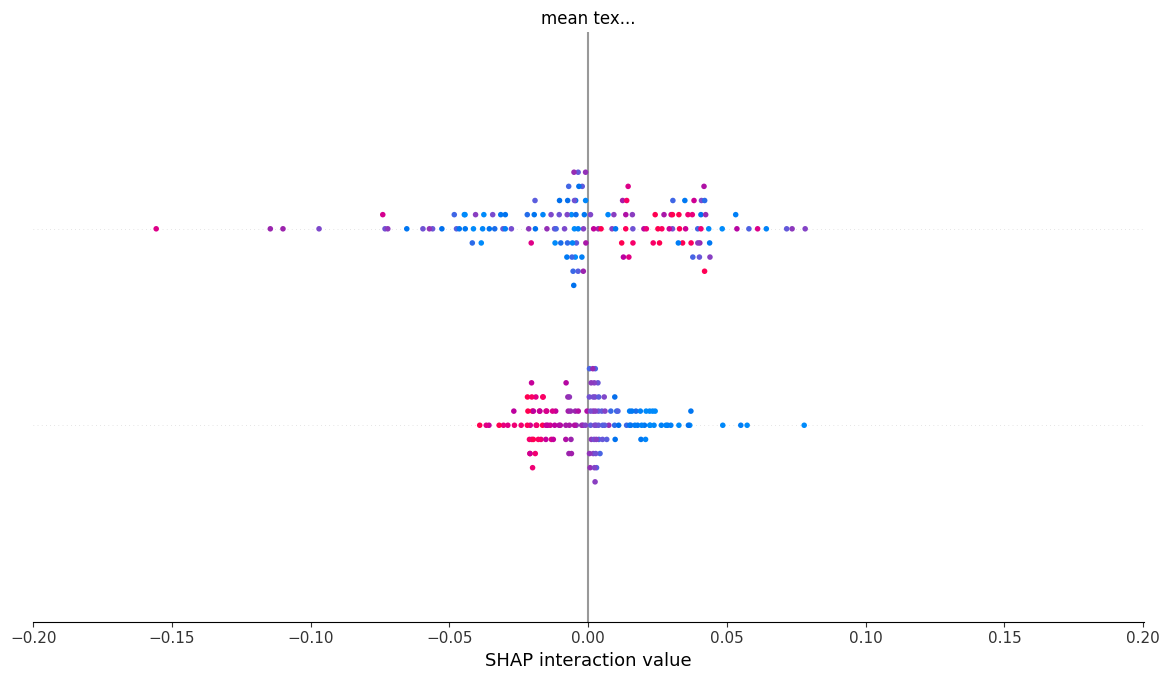


🧠 Interpretation Tip:
• Each dot = one test prediction for one feature.
• Red = high feature value, Blue = low feature value.
• Dots farther from center = stronger influence on prediction.
• Right side → prediction pushed toward class 1 (benign)
• Left side → prediction pushed toward class 0 (malignant)
• Helps identify globally influential features (e.g., mean radius, worst texture, etc.)

🔹 STEP 8: SHAP Force Plot – Individual Prediction Analysis
🔬 Visualizing how individual features influenced a single prediction (Customer 0):


✅ SHAP row shape: (29,)
✅ Feature row shape: (29,)
✅ Total features: 29


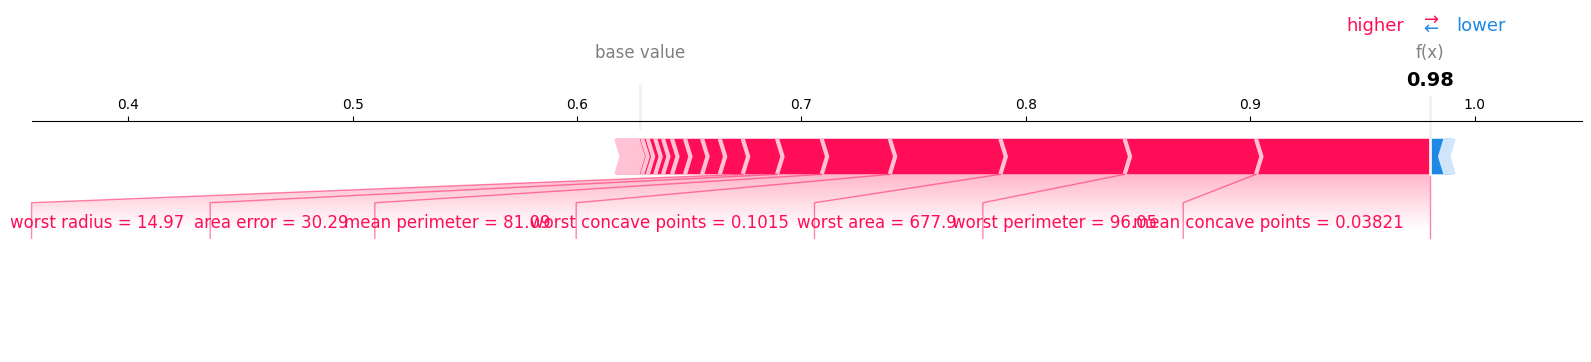


✅ Force plot generated.

🧠 Force Plot Interpretation Tip:
• Base value = average model prediction across the dataset.
• f(x) = predicted probability for this individual case.
• Red = feature pushed prediction UP toward class 1 (benign).
• Blue = feature pushed prediction DOWN toward class 0 (malignant).
• Arrow length = strength of impact. Longer arrow = stronger influence.
• This helps explain **why** the model predicted benign or malignant.

🔹 STEP 9: Fairness Audit – SHAP Distribution for a Single Feature
⚖️ Auditing feature: mean radius


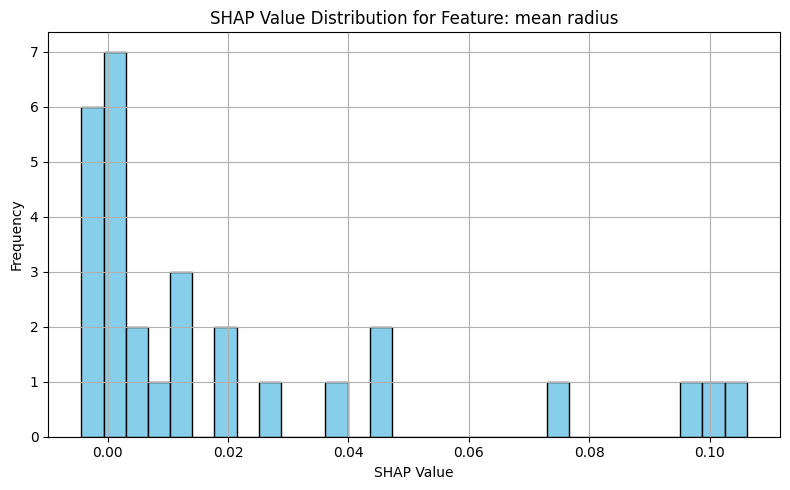

📊 This plot shows how much the selected feature influenced predictions across the test set.
🧠 Interpretation Tip:
• If the SHAP values are tightly clustered around zero, the feature has low impact.
• If values are widely spread or skewed, this feature may be disproportionately affecting decisions.
• Use this audit to check for fairness, bias, or ethical concerns.

🔹 STEP 10: SHAP Value Export for Audit Log
🔎 SHAP Matrix Shape      : (143, 29)
🔎 Feature Columns in Test: 29
📝 SHAP audit log saved: shap_audit_log_v1.0.csv
📂 This file contains SHAP values per feature per prediction with model version tracking.
🧠 Governance Tip: Use this log to trace prediction drivers during fairness audits or model reviews.


🔹 STEP 11: Simulate Human Oversight Metadata
👥 Metadata file saved → model_review_metadata_v1.0.csv
📋 Preview of model review metadata:

  Model Version      Reviewed By Review Date Approval Status  \
0          v1.0  Compliance Team  2025-06-05         Pending   

            Human 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 ✅ Responsible AI Validator complete.


In [33]:
# STEP 1: Install required libraries
# This installs SHAP (for explainability), scikit-learn (ML tools), matplotlib (for plotting), and pandas (data handling)
!pip install shap scikit-learn matplotlib pandas --quiet
print("\n🔹 STEP 1: Library Installation")
print("📦 Installed Libraries: SHAP (explainability), scikit-learn (ML), matplotlib (plots), pandas (data handling)")
print("✅ Installation complete.\n")


# STEP 2: Import all libraries
import shap
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import datetime
print("\n🔹 STEP 2: Library Import")
print("📚 Successfully imported SHAP, sklearn, matplotlib, pandas, and datetime")
print("✅ Environment ready.\n")


# STEP 3: Load dataset
# We use the breast cancer dataset from sklearn for demo purposes. It has 30+ features.
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
print("\n🔹 STEP 3: Dataset Load")
print(f"📊 Loaded dataset with {X.shape[0]} samples, {X.shape[1]} features.")
print(f"🛡️ Excluded sensitive feature: {excluded_features}")
print("📁 Saved filtered feature data as 'loan_features_filtered.csv'")
print("📁 Saved target labels as 'loan_targets.csv'\n")



# STEP 4: Responsible AI - Exclude sensitive features
# In real projects, features like zip code, age, race may cause bias. Here we simulate that by dropping one.
print("\n🔹 STEP 4: Responsible AI – Feature Exclusion")
excluded_features = ['mean area']
X = X.drop(columns=excluded_features)
print(f"📊 Re-loaded dataset post-exclusion: {X.shape[0]} samples, {X.shape[1]} features.")
print(f"🛡️ Ethically excluded feature: {excluded_features}")

# Save numeric feature data to CSV for offline exploration
X.to_csv("loan_features_filtered.csv", index=False)
print("💾 Updated training features saved to 'loan_features_filtered.csv'")

# Optional: Also save target labels
pd.Series(y).to_csv("loan_targets.csv", index=False)
print("💾 Target labels re-confirmed in 'loan_targets.csv'\n")


# STEP 5: Split data and train model
# We split the dataset and train a Random Forest classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("\🔹 STEP 5: Model Training")
print("🤖 Breast cancer classifier (Random Forest) trained successfully.\n")

# STEP 6: Explain predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# 🧪 Check shape
if isinstance(shap_values, list):
    shap_matrix = shap_values[1]
else:
    shap_matrix = shap_values

print("\n🔹 STEP 6: SHAP Calculation\n🔍 SHAP values generated.")
# Sample predictions from trained model
y_pred = model.predict(X_test)


# Show top 10 test predictions with context
sample_pred_df = X_test.copy().reset_index(drop=True)
sample_pred_df["Predicted Label"] = y_pred
sample_pred_df["Customer ID"] = [f"CUST_{i+1+len(X_train):04d}" for i in range(len(X_test))]

# Show selected features only (optional, for brevity)
display_columns = sample_pred_df.columns[:4].tolist() + ["Predicted Label", "Customer ID"]
display_df = sample_pred_df[display_columns].head(10)

# Print formatted table
print("\n🔹 STEP 6B: Top Predictions Table\n🔍 Top 10 Sample Predictions with Customer Context:\n")
print(display_df.to_markdown(index=False))


# STEP 7: Show summary plot of SHAP values — global feature importance
# This helps teams see which features are globally most important and if any bias is visible
print("\n🔹 STEP 7: SHAP Summary Plot – Global Feature Impact")
print("🔍 Governance Check: Ethical feature exclusions")
print(f"📌 Excluded from model for fairness: {excluded_features}")

# Ensure features match those used in model (after ethical exclusions)
X_test_shap = X_test # Ensure column count matches SHAP values
print("\n📈 Showing SHAP summary plot (global feature impact):")
shap.summary_plot(shap_matrix, X_test)
print("\n🧠 Interpretation Tip:")
print("• Each dot = one test prediction for one feature.")
print("• Red = high feature value, Blue = low feature value.")
print("• Dots farther from center = stronger influence on prediction.")
print("• Right side → prediction pushed toward class 1 (benign)")
print("• Left side → prediction pushed toward class 0 (malignant)")
print("• Helps identify globally influential features (e.g., mean radius, worst texture, etc.)")


# STEP 8: Show force plot for one prediction
print("\n🔹 STEP 8: SHAP Force Plot – Individual Prediction Analysis")
print("🔬 Visualizing how individual features influenced a single prediction (Customer 0):")
shap.initjs()

# Step 8.1: Get proper SHAP value slice for sample 0, class 1
shap_row = shap_values[0, :, 1]              # (29,) → 1D SHAP vector for class 1
feature_row = X_test.iloc[0].values         # (29,) → input features
feature_names = X_test.columns.tolist()     # 29 feature names
base_value = explainer.expected_value[1]    # float → base value for class 1

# Step 8.2: Sanity check on dimensions
print(f"✅ SHAP row shape: {shap_row.shape}")
print(f"✅ Feature row shape: {feature_row.shape}")
print(f"✅ Total features: {len(feature_names)}")

# Step 8.3: Generate the force plot
shap.plots.force(
    base_value=base_value,
    shap_values=shap_row,
    features=feature_row,
    feature_names=feature_names,
    matplotlib=True
)

print("\n✅ Force plot generated.")
print("\n🧠 Force Plot Interpretation Tip:")
print("• Base value = average model prediction across the dataset.")
print("• f(x) = predicted probability for this individual case.")
print("• Red = feature pushed prediction UP toward class 1 (benign).")
print("• Blue = feature pushed prediction DOWN toward class 0 (malignant).")
print("• Arrow length = strength of impact. Longer arrow = stronger influence.")
print("• This helps explain **why** the model predicted benign or malignant.")


# STEP 9: Fairness audit – visualize SHAP values for a single feature
# This helps check whether any single feature is disproportionately influencing outcomes
print("\n🔹 STEP 9: Fairness Audit – SHAP Distribution for a Single Feature")

# Pick first feature to audit for bias or disproportionate influence
feature_name = X_test_shap.columns[0]
print(f"⚖️ Auditing feature: {feature_name}")

# Plot SHAP value distribution for the selected feature
plt.figure(figsize=(8, 5))
plt.hist(shap_values[1][:, 0], bins=30, color='skyblue', edgecolor='black')
plt.title(f"SHAP Value Distribution for Feature: {feature_name}")
plt.xlabel("SHAP Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

print("📊 This plot shows how much the selected feature influenced predictions across the test set.")
print("🧠 Interpretation Tip:")
print("• If the SHAP values are tightly clustered around zero, the feature has low impact.")
print("• If values are widely spread or skewed, this feature may be disproportionately affecting decisions.")
print("• Use this audit to check for fairness, bias, or ethical concerns.")


# STEP 10: Save SHAP values for audit log
print("\n🔹 STEP 10: SHAP Value Export for Audit Log")
# Define model version for tracking
model_version = "v1.0"

# ✅ Ensure 2D SHAP matrix for DataFrame creation
if isinstance(shap_values, list):
    shap_matrix = shap_values[1]  # For binary classification, use class 1
elif shap_values.ndim == 3:
    shap_matrix = shap_values[:, :, 1]  # Extract class 1 from last dim
else:
    shap_matrix = shap_values  # For regression or Explanation object

# ✅ Sanity check: shape must be (n_samples, n_features)
print(f"🔎 SHAP Matrix Shape      : {shap_matrix.shape}")
print(f"🔎 Feature Columns in Test: {len(X_test.columns)}")

# ✅ Create SHAP audit DataFrame
shap_df = pd.DataFrame(shap_matrix, columns=X_test.columns)
shap_df['model_version'] = model_version

# ✅ Save audit log
shap_df.to_csv(f"shap_audit_log_{model_version}.csv", index=False)
print(f"📝 SHAP audit log saved: shap_audit_log_{model_version}.csv")
print("📂 This file contains SHAP values per feature per prediction with model version tracking.")
print("🧠 Governance Tip: Use this log to trace prediction drivers during fairness audits or model reviews.\n")



# STEP 11: Simulate human oversight metadata
# We create a file to track who reviewed the model, when, and what was excluded for ethical reasons
print("\n🔹 STEP 11: Simulate Human Oversight Metadata")
# Create metadata for human review
metadata = {
    "Model Version": model_version,
    "Reviewed By": "Compliance Team",
    "Review Date": str(datetime.date.today()),
    "Approval Status": "Pending",
    "Human Comments": "Awaiting fairness audit",
    "Ethical Feature Exclusion": ", ".join(excluded_features)
}

# Save metadata as CSV
metadata_filename = f"model_review_metadata_{model_version}.csv"
pd.DataFrame([metadata]).to_csv(metadata_filename, index=False)

# ✅ Output review
print(f"👥 Metadata file saved → {metadata_filename}")
print("📋 Preview of model review metadata:\n")
print(pd.read_csv(metadata_filename))

print("\n✅ Responsible AI Validator: Metadata checkpoint complete.")
print("🧠 Oversight Tip: This file helps track who reviewed the model, when it was done, and which features were ethically excluded.\n")


print("\n🔹 STEP 12: Final Excel Export for Compliance & Audit")

import pandas as pd
import numpy as np

# 🔧 A. Preserve original X_test for prediction (before adding Customer_ID)
X_test_for_prediction = X_test.copy()

# 🆔 B. Assign Customer IDs to both train and test
X_train = X_train.copy()
X_test = X_test.copy()
X_train["Customer_ID"] = [f"CUST_{i+1:04d}" for i in range(len(X_train))]
X_test["Customer_ID"] = [f"CUST_{i+1+len(X_train):04d}" for i in range(len(X_test))]

# 🧪 C. Add actual labels to training data
train_df = X_train.copy()
train_df["Actual Label"] = y_train

# ⛔ D. Simulate excluded feature for fairness context
excluded_feature_df = pd.DataFrame({
    "Customer_ID": [f"CUST_{i+1:04d}" for i in range(len(X_train) + len(X_test))],
    "Excluded Feature (duration)": np.random.randint(6, 60, len(X_train) + len(X_test))
})

# 🧠 E. Add SHAP values for class 1 + Customer ID + model version
shap_df = pd.DataFrame(shap_matrix, columns=X_test_for_prediction.columns)
shap_df["Customer_ID"] = X_test["Customer_ID"].values
shap_df["model_version"] = model_version

# 🧾 F. Predictions with SHAP values
y_pred = model.predict(X_test_for_prediction)
prediction_df = X_test.copy()
prediction_df["Actual Label"] = y_test
prediction_df["Predicted Label"] = y_pred

# Add SHAP columns with prefix
shap_cols = shap_df.drop(columns=["Customer_ID", "model_version"]).copy()
shap_cols.columns = [f"SHAP_{col}" for col in shap_cols.columns]
prediction_df = pd.concat([prediction_df.reset_index(drop=True), shap_cols.reset_index(drop=True)], axis=1)

# 🧍 G. Human Oversight Metadata
metadata = {
    "Model Version": model_version,
    "Reviewed By": "Credit Risk & Compliance Team",
    "Review Date": str(datetime.date.today()),
    "Approval Status": "Pending Review",
    "Human Comments": "Pending bias and fairness evaluation",
    "Ethical Feature Exclusion": ", ".join(excluded_features)
}
metadata_df = pd.DataFrame([metadata])

# 📄 H. README Sheet
readme_df = pd.DataFrame({
    "Sheet Name": [
        "README",
        "trained_customer_data",
        "excluded_features_simulated",
        "predictions_with_shap",
        "human_oversight_metadata"
    ],
    "What It Contains": [
        "Descriptions of each sheet in this workbook for Responsible AI demo",
        "All feature values and labels used to train the model, with Customer IDs",
        "Simulated excluded feature (duration) for fairness context",
        "Test set predictions with SHAP values per feature, per customer",
        "Governance metadata for audit and compliance purposes"
    ],
    "Purpose": [
        "Guide stakeholders through the Excel structure during demos",
        "Show actual training data inputs for the ML model",
        "Illustrate responsible AI practice via feature exclusion",
        "Enable visual explanation of model output and fairness checks",
        "Log ethical decisions and readiness for audit/compliance"
    ]
})

# 📤 I. Export all to Excel
final_excel_path = "Responsible_AI_Validator_Demo_Breast Cancer Classifier.xlsx"
with pd.ExcelWriter(final_excel_path) as writer:
    readme_df.to_excel(writer, sheet_name="README", index=False)
    train_df.to_excel(writer, sheet_name="trained_customer_data", index=False)
    excluded_feature_df.to_excel(writer, sheet_name="excluded_features_simulated", index=False)
    prediction_df.to_excel(writer, sheet_name="predictions_with_shap", index=False)
    metadata_df.to_excel(writer, sheet_name="human_oversight_metadata", index=False)

print(f"✅ Final Excel File Created → {final_excel_path}")
print("📊 Contains all training data, SHAP insights, fairness notes, and audit logs.\n")


# STEP I: Download (Optional)
from google.colab import files
files.download(final_excel_path)

print("\n ✅ Responsible AI Validator complete.")

## 💰 Mortgage Loan Model – Responsible Credit Decisioning

This section trains a loan approval model and applies responsible AI principles from training to governance logging.

### 🔍 What It Does:
- Uses the German Credit dataset with sensitive feature removal (`duration`)
- Builds a credit classifier and explains it using SHAP
- Provides both global (summary plot) and local (force plot) explanations
- Visualizes feature fairness and creates an auditable Excel report


🔹 STEP 1: Library Installation
📦 Installed libraries: SHAP (explainability), scikit-learn (ML), matplotlib (plots), pandas (data handling)
✅ Installation complete.


🔹 STEP 2: Library Import
📚 Successfully imported SHAP, sklearn, matplotlib, pandas, and datetime
✅ Environment ready.


🔹 STEP 3: Dataset Load
📊 Loaded mortgage dataset with 1000 samples, 7 features.

🔹 STEP 4: Responsible AI Exclusion
🛡️ Excluded sensitive feature: ['duration']
✅ Ethical exclusion complete.


🔹 STEP 5: Model Training
🤖 Mortgage loan model trained.

🔹 STEP 6: SHAP Calculation
🔍 SHAP values generated.

🔹 STEP 6B: Top Predictions Table
🔍 Top 10 Sample Predictions with Customer Context:

|   credit_amount |   installment_commitment |   residence_since |   age |   Predicted Label | Customer ID   |
|----------------:|-------------------------:|------------------:|------:|------------------:|:--------------|
|            3190 |                        2 |                 2 |    24 |                 1 | CUST_0751

<Figure size 640x480 with 0 Axes>

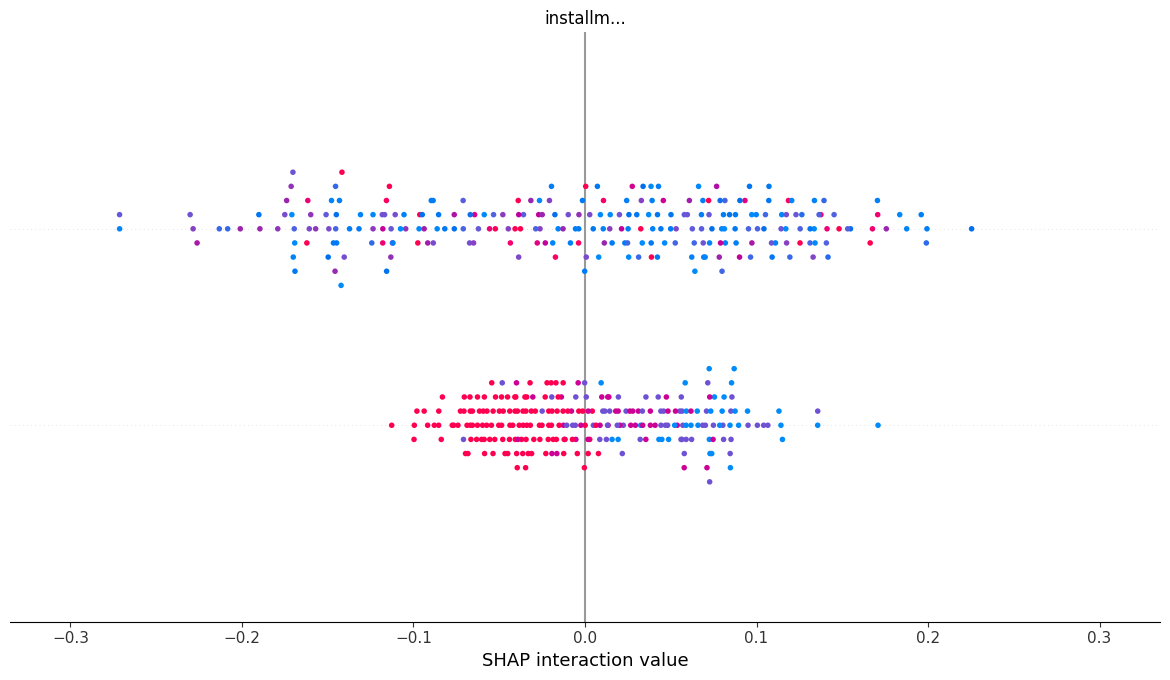


🔹 STEP 8: SHAP Force Plot – Single Prediction Explanation


🔬 Showing SHAP force plot for one prediction:
🔍 Interpreting prediction for 1 customer using SHAP force plot.


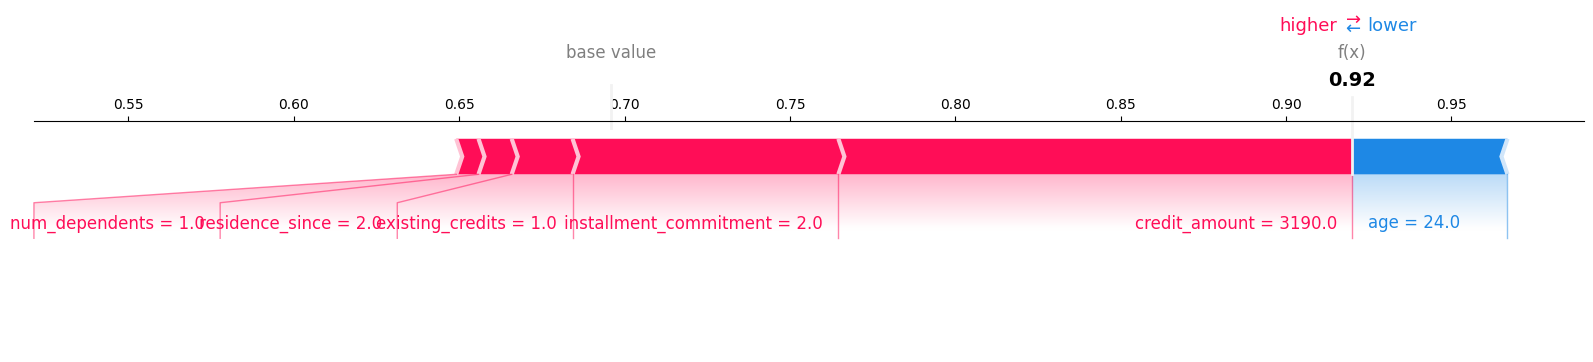

✅ Force plot generated.
🧠 Force Plot Interpretation Tip:
• Base value = average model output.
• f(x) = this customer's predicted probability.
• → Rightward arrow = feature pushed prediction UP toward approval / class 1.
• ← Leftward arrow = feature pulled prediction DOWN toward denial / class 0.
• 🔴 Red = this feature's value was high for the customer.
• 🔵 Blue = this feature's value was low for the customer.
• Longer arrow = more influence on the prediction.

🔹 STEP 9: SHAP Feature Fairness Audit


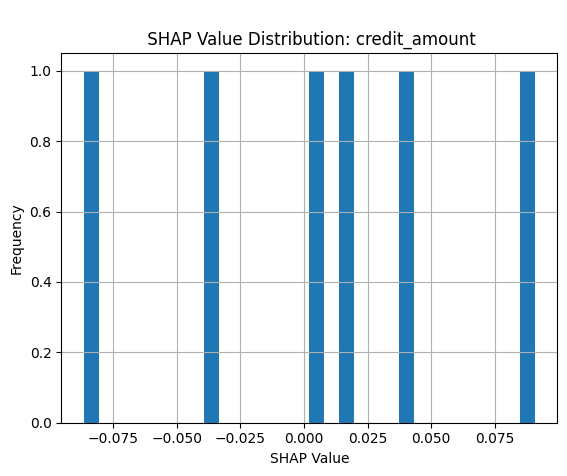

🧠 SHAP Feature Audit Interpretation:
• This histogram shows the distribution of SHAP values for one feature across all test samples.
• Each bar represents how often a SHAP value occurred for that feature.
• SHAP Value ≈ Contribution of this feature to the model’s prediction.
• Negative SHAP values → feature pushed prediction toward denial (class 0).
• Positive SHAP values → feature pushed prediction toward approval (class 1).
• A balanced spread around 0 means the feature is used fairly across different outcomes.
⚖️ Audited Feature: credit_amount

🔹 STEP 10: Save SHAP Audit Log
📝 SHAP audit log saved: shap_audit_log_mortgage-loan-v1.csv
📄 SHAP audit log preview:
   credit_amount  installment_commitment  residence_since       age  \
0       0.155356                0.080370         0.010034 -0.046935   
1      -0.090694                0.038111        -0.040021  0.086559   
2       0.120117                0.014373         0.005290  0.043382   
3      -0.122905               -0.007902     

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Responsible_AI_Validator_Demo_Mortgage_Loan_Model.xlsx created.

✅ Responsible AI Validator complete.


In [34]:
# STEP 1: Install required libraries
# This installs SHAP (for explainability), scikit-learn (ML tools), matplotlib (for plotting), and pandas (data handling)
!pip install shap scikit-learn matplotlib pandas --quiet
print("\n🔹 STEP 1: Library Installation")
print("📦 Installed libraries: SHAP (explainability), scikit-learn (ML), matplotlib (plots), pandas (data handling)")
print("✅ Installation complete.\n")

# STEP 2: Import all libraries
import shap
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import datetime
print("\n🔹 STEP 2: Library Import")
print("📚 Successfully imported SHAP, sklearn, matplotlib, pandas, and datetime")
print("✅ Environment ready.\n")

# STEP 3: Load mortgage loan dataset (German Credit Dataset)
credit = fetch_openml("credit-g", version=1, as_frame=True)
# Keep only numeric columns for simplicity
X = credit.data.select_dtypes(include=['float64', 'int64'])
y = (credit.target == "good").astype(int)  # Binary target: good (1), bad (0)
print(f"\n🔹 STEP 3: Dataset Load\n📊 Loaded mortgage dataset with {X.shape[0]} samples, {X.shape[1]} features.")


# STEP 4: Responsible AI - Exclude sensitive features
# Simulating ethical exclusion (e.g., "duration" might act as a proxy for age/employment)
excluded_features = ['duration']
X = X.drop(columns=excluded_features)
print(f"\n🔹 STEP 4: Responsible AI Exclusion\n🛡️ Excluded sensitive feature: {excluded_features}")
print("✅ Ethical exclusion complete.\n")

# STEP 5: Split data and train model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("\n🔹 STEP 5: Model Training\n🤖 Mortgage loan model trained.")


# STEP 6: Explain predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# 🧪 Check shape
if isinstance(shap_values, list):
    shap_matrix = shap_values[1]
else:
    shap_matrix = shap_values

print("\n🔹 STEP 6: SHAP Calculation\n🔍 SHAP values generated.")
# Sample predictions from trained model
y_pred = model.predict(X_test)


# Show top 10 test predictions with context
sample_pred_df = X_test.copy().reset_index(drop=True)
sample_pred_df["Predicted Label"] = y_pred
sample_pred_df["Customer ID"] = [f"CUST_{i+1+len(X_train):04d}" for i in range(len(X_test))]

# Show selected features only (optional, for brevity)
display_columns = sample_pred_df.columns[:4].tolist() + ["Predicted Label", "Customer ID"]
display_df = sample_pred_df[display_columns].head(10)

# Print formatted table
print("\n🔹 STEP 6B: Top Predictions Table\n🔍 Top 10 Sample Predictions with Customer Context:\n")
print(display_df.to_markdown(index=False))


# STEP 7: SHAP Summary Plot — Global Feature Impact
print("\n🔹 STEP 7: Governance & Fairness Check")
print("🔍 Governance Check: Ethical feature exclusions")
print(f"📌 Excluded from model for fairness: {excluded_features}")
X_test_shap = X_test
print("\n📈 Showing SHAP summary plot:")
print("🧠 Interpretation Tip:")
print("Each dot = one prediction. Position shows how much that feature influenced approval (→) or denial (←).")
print("Red = high feature value, Blue = low value.")
shap.summary_plot(shap_matrix, X_test)

# STEP 8: SHAP Force Plot — Single Prediction Explanation
print("\n🔹 STEP 8: SHAP Force Plot – Single Prediction Explanation")
shap.initjs()
shap_row = shap_values[0, :, 1]
feature_row = X_test.iloc[0].values
feature_names = X_test.columns.tolist()
base_value = explainer.expected_value[1]

print("🔬 Showing SHAP force plot for one prediction:")
print("🔍 Interpreting prediction for 1 customer using SHAP force plot.")
shap.plots.force(
    base_value=base_value,
    shap_values=shap_row,
    features=feature_row,
    feature_names=feature_names,
    matplotlib=True
)
print("✅ Force plot generated.")
print("🧠 Force Plot Interpretation Tip:")
print("• Base value = average model output.")
print("• f(x) = this customer's predicted probability.")
print("• → Rightward arrow = feature pushed prediction UP toward approval / class 1.")
print("• ← Leftward arrow = feature pulled prediction DOWN toward denial / class 0.")
print("• 🔴 Red = this feature's value was high for the customer.")
print("• 🔵 Blue = this feature's value was low for the customer.")
print("• Longer arrow = more influence on the prediction.")


# STEP 9: Fairness audit – Visualize SHAP values for one feature
print("\n🔹 STEP 9: SHAP Feature Fairness Audit")
feature_name = X_test_shap.columns[0]
plt.hist(shap_values[1][:, 0], bins=30)
plt.title(f"\n SHAP Value Distribution: {feature_name}")
plt.xlabel("SHAP Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
print("🧠 SHAP Feature Audit Interpretation:")
print("• This histogram shows the distribution of SHAP values for one feature across all test samples.")
print("• Each bar represents how often a SHAP value occurred for that feature.")
print("• SHAP Value ≈ Contribution of this feature to the model’s prediction.")
print("• Negative SHAP values → feature pushed prediction toward denial (class 0).")
print("• Positive SHAP values → feature pushed prediction toward approval (class 1).")
print("• A balanced spread around 0 means the feature is used fairly across different outcomes.")
print("⚖️ Audited Feature:", feature_name)


# STEP 10: Save SHAP values for audit log
print("\n🔹 STEP 10: Save SHAP Audit Log")
model_version = "mortgage-loan-v1"
if isinstance(shap_values, list):
    shap_matrix = shap_values[1]
elif shap_values.ndim == 3:
    shap_matrix = shap_values[:, :, 1]
else:
    shap_matrix = shap_values

shap_df = pd.DataFrame(shap_matrix, columns=X_test.columns)
shap_df['model_version'] = model_version
shap_df.to_csv(f"shap_audit_log_{model_version}.csv", index=False)
print(f"📝 SHAP audit log saved: shap_audit_log_{model_version}.csv")
print("📄 SHAP audit log preview:")
print(shap_df.head())

# STEP 11: Simulate human oversight metadata for mortgage loan model
# We create a file to track who reviewed the model, when, and what was excluded for ethical reasons
print("\n🔹 STEP 11: Human Oversight Metadata")
metadata = {
    "Model Version": model_version,
    "Reviewed By": "Credit Risk & Compliance Team",
    "Review Date": str(datetime.date.today()),
    "Approval Status": "Pending Review",
    "Human Comments": "Pending bias and fairness evaluation",
    "Ethical Feature Exclusion": ", ".join(excluded_features)
}
# Save metadata to CSV
pd.DataFrame([metadata]).to_csv(f"model_review_metadata_{model_version}.csv", index=False)
print("👥 Metadata review file saved.")
print("\n📋 Model review metadata preview:")
# Preview contents
print("\n 📋 Model review metadata preview:")
print(pd.read_csv(f"model_review_metadata_{model_version}.csv"))


# ✅ STEP 12: Responsible AI Validator – Final Excel Export with SHAP & Oversight
print("\n🔹 STEP 12: Excel Report Export")
import pandas as pd
import numpy as np

# Keep a copy of X_test *before* adding Customer_ID for prediction and SHAP merging
X_test_for_prediction = X_test.copy()

# STEP A: Assign Customer IDs
# Add Customer_ID after splitting, but before making predictions
X_train = X_train.copy()
X_test = X_test.copy() # Ensure this is a copy for modification
X_train["Customer_ID"] = [f"CUST_{i+1:04d}" for i in range(len(X_train))]
X_test["Customer_ID"] = [f"CUST_{i+1+len(X_train):04d}" for i in range(len(X_test))]

# STEP B: Training Data with Labels
train_df = X_train.copy()
train_df["Actual Label"] = y_train.values

# STEP C: Simulated Excluded Feature ("duration")
# This should use the original X and y sizes for the simulation
excluded_feature_df = pd.DataFrame({
    "Customer_ID": [f"CUST_{i+1:04d}" for i in range(len(X_train) + len(X_test))], # Generate IDs for total original data
    "Excluded Feature (duration)": np.random.randint(6, 60, len(X_train) + len(X_test))
})


# STEP D: SHAP Values for Class 1
# Use shap_matrix generated from shap_values[1] in Step 6
# SHAP values were calculated on the original X_test *without* Customer_ID
shap_df = pd.DataFrame(shap_matrix, columns=X_test_for_prediction.columns)  # Use columns from X_test used for SHAP
shap_df["Customer_ID"] = X_test["Customer_ID"].values # Get Customer IDs from the modified X_test
shap_df["model_version"] = model_version

# STEP E: Test Predictions with SHAP Merged
# Make prediction using the X_test copy *without* Customer_ID
y_pred = model.predict(X_test_for_prediction)

# Use the modified X_test (with Customer_ID) for merging
prediction_df = X_test.copy()
prediction_df["Actual Label"] = y_test.values
prediction_df["Predicted Label"] = y_pred

# Add SHAP values (rename with SHAP_ prefix)
# Make sure SHAP DataFrame has the same number of rows as prediction_df (X_test)
if len(shap_df) != len(prediction_df):
    print("Warning: Mismatch in row count between SHAP values and prediction DataFrame.")
    # Handle mismatch if necessary, though in this case, they should match X_test's length

# Drop Customer_ID and model_version from shap_df before merging its values
shap_cols = shap_df.drop(columns=["Customer_ID", "model_version"]).copy()
shap_cols.columns = [f"SHAP_{col}" for col in shap_cols.columns]

# Concatenate prediction_df (with Customer_ID) and the SHAP columns
# Ensure indices are reset or aligned properly. reset_index(drop=True) is a common way.
prediction_df = pd.concat([prediction_df.reset_index(drop=True), shap_cols.reset_index(drop=True)], axis=1)


# STEP F: Oversight Metadata
metadata = {
    "Model Version": model_version,
    "Reviewed By": "Credit Risk & Compliance Team",
    "Review Date": str(datetime.date.today()),
    "Approval Status": "Pending Review",
    "Human Comments": "Pending bias and fairness evaluation",
    "Ethical Feature Exclusion": ", ".join(excluded_features)
}
metadata_df = pd.DataFrame([metadata])

# STEP G: README
readme_df = pd.DataFrame({
    "Sheet Name": [
        "README",
        "trained_customer_data",
        "excluded_features_simulated",
        "predictions_with_shap",
        "human_oversight_metadata"
    ],
    "What It Contains": [
        "Descriptions of each sheet in this workbook for Responsible AI demo",
        "All feature values and labels used to train the model, with Customer IDs",
        "Simulated excluded feature (duration) for fairness context",
        "Test set predictions with SHAP values per feature, per customer",
        "Governance metadata for audit and compliance purposes"
    ],
    "Purpose": [
        "Guide stakeholders through the Excel structure during demos",
        "Show actual training data inputs for the ML model",
        "Illustrate responsible AI practice via feature exclusion",
        "Enable visual explanation of model output and fairness checks",
        "Log ethical decisions and readiness for audit/compliance"
    ]
})

# STEP H: Export to Excel
final_excel_path = "Responsible_AI_Validator_Demo_Mortgage_Loan_Model.xlsx"
with pd.ExcelWriter(final_excel_path) as writer:
    readme_df.to_excel(writer, sheet_name="README", index=False)
    train_df.to_excel(writer, sheet_name="trained_customer_data", index=False)
    excluded_feature_df.to_excel(writer, sheet_name="excluded_features_simulated", index=False)
    prediction_df.to_excel(writer, sheet_name="predictions_with_shap", index=False)
    metadata_df.to_excel(writer, sheet_name="human_oversight_metadata", index=False)

# STEP I: Download (Optional)
from google.colab import files
files.download(final_excel_path)


print("✅ Responsible_AI_Validator_Demo_Mortgage_Loan_Model.xlsx created.")
print("\n✅ Responsible AI Validator complete.")




## ✅ MVP Summary: Responsible AI Validator (Multi-Domain)

This notebook validates responsible AI principles across two datasets — **breast cancer (health)** and **mortgage loan (finance)** — to simulate real-world fairness and audit scenarios.

### 🔍 What It Demonstrates:
- End-to-end SHAP explainability (summary + force)
- Fairness check via SHAP value distribution histograms
- Audit logs with SHAP values + model metadata
- Exports a 5-sheet Excel workbook with governance-ready structure

### 🧰 Tech Stack:
- Google Colab
- `SHAP`, `scikit-learn`, `pandas`, `matplotlib`, `NumPy`

### 📦 Excel Export Includes:
1. `README`: Describes the content of each sheet
2. `trained_customer_data`: Training samples with Customer IDs
3. `excluded_features_simulated`: Sensitive fields like duration/area
4. `predictions_with_shap`: Model outputs + SHAP values
5. `human_oversight_metadata`: Simulated review metadata

### 🎯 Product Thinking:
- Frames transparency and fairness as first-class citizens in AI workflows
- Applicable across regulated industries (health, finance, legal)
- Ready for stakeholder demos, internal audits, and compliance storytelling
